# DA5401 A6: Imputation via Regression for Missing Data

**Given Objective:**

This assignment challenges you to apply linear and non-linear regression to impute missing values in a dataset. The effectiveness of your imputation methods will be measured indirectly by assessing the performance of a subsequent classification task, comparing the regression-based approach against simpler imputation strategies.

## Problem Statement

You are a machine learning engineer working on a credit risk assessment project. You have been provided with the UCI Credit Card Default Clients Dataset. This dataset has missing values in several important feature columns. The presence of missing data prevents the immediate application of many classification algorithms.

Your task is to implement three different strategies for handling the missing data and then use the resulting clean datasets to train and evaluate a classification model. This will demonstrate how the choice of imputation technique significantly impacts final model performance.

You will submit a Jupyter Notebook with your complete code, visualizations, and a plausible story that explains your findings. The notebook should be well-commented, reproducible, and easy to follow.


### Dataset 

- **UCI Credit Card Default Clients Dataset (with missing values)**: Kaggle - [Credit Card Default Clients Dataset](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)
	- *Note: While the original UCI dataset is relatively clean, for this assignment, you should artificially introduce ***Missing At Random (MAR)*** values (e.g., replace 5% of the values in the 'AGE' and 'BILL_AMT' columns with NaN) before starting Part A, to simulate a real-world scenario with a substantial missing data problem.*

**About the Dataset**


This dataset contains information on *default payments*, *demographic factors*, *credit data*, *payment history*, and *bill statements* of credit card clients in Taiwan from **April 2005 to September 2005**.

<u>Feature Descriptions:</u>

| **Feature Name** | **Description** |
|-------------------|-----------------|
| ID | ID of each client |
| LIMIT_BAL | Amount of given credit in NT dollars (includes individual and family/supplementary credit) |
| SEX | Gender (1 = male, 2 = female) |
| EDUCATION | Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown) |
| MARRIAGE | Marital status (1 = married, 2 = single, 3 = others) |
| AGE | Age in years |
| PAY_0 | Repayment status in September 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = delay for two months, …, 8 = delay for eight months, 9 = delay for nine months and above) |
| PAY_2 | Repayment status in August 2005 (same scale as above) |
| PAY_3 | Repayment status in July 2005 (same scale as above) |
| PAY_4 | Repayment status in June 2005 (same scale as above) |
| PAY_5 | Repayment status in May 2005 (same scale as above) |
| PAY_6 | Repayment status in April 2005 (same scale as above) |
| BILL_AMT1 | Amount of bill statement in September 2005 (NT dollars) |
| BILL_AMT2 | Amount of bill statement in August 2005 (NT dollars) |
| BILL_AMT3 | Amount of bill statement in July 2005 (NT dollars) |
| BILL_AMT4 | Amount of bill statement in June 2005 (NT dollars) |
| BILL_AMT5 | Amount of bill statement in May 2005 (NT dollars) |
| BILL_AMT6 | Amount of bill statement in April 2005 (NT dollars) |
| PAY_AMT1 | Amount of previous payment in September 2005 (NT dollars) |
| PAY_AMT2 | Amount of previous payment in August 2005 (NT dollars) |
| PAY_AMT3 | Amount of previous payment in July 2005 (NT dollars) |
| PAY_AMT4 | Amount of previous payment in June 2005 (NT dollars) |
| PAY_AMT5 | Amount of previous payment in May 2005 (NT dollars) |
| PAY_AMT6 | Amount of previous payment in April 2005 (NT dollars) |
| default.payment.next.month | Default payment indicator (1 = yes, 0 = no) |


# Tasks

## Part A: Data Preprocessing and Imputation

### Question 1 : Load and Prepare Data

Load the dataset and, as instructed in the note above, **artificially introduce MAR missing values** (5-10% in 2-3 numerical feature columns).
The target variable is 'default payment next month'.

In [29]:
# Import Necessary Libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [30]:
# Download latest version of the dataset.

import kagglehub

folder_path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")
file_name = os.listdir(folder_path)[0]
data_path = os.path.join(folder_path, file_name)

In [31]:
# # Read the CSV file into a dataframe.

data = pd.read_csv(data_path)

# Preview the data.

data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [32]:
print("Number of sampels: ", data.shape[0])
print("Number of features: ", data.shape[1])

Number of sampels:  30000
Number of features:  25


<BarContainer object of 2 artists>

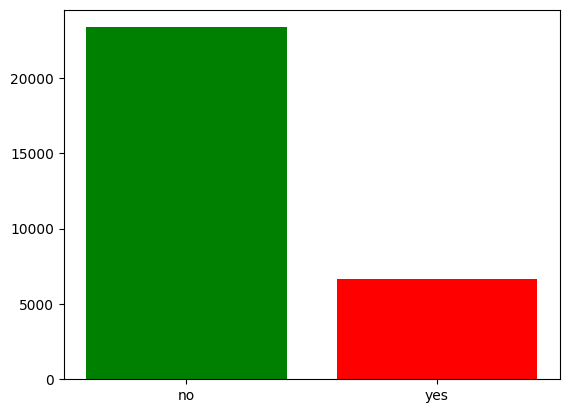

In [33]:
class_dist = pd.DataFrame(data['default.payment.next.month'].value_counts())
class_dist = class_dist.reset_index()
class_map = {0:'no', 1:'yes'}
class_dist['default.payment.next.month'] = class_dist['default.payment.next.month'].map(class_map)

plt.bar(class_dist['default.payment.next.month'],class_dist['count'], color=['green', 'red'])

In [34]:
class_dist

,default.payment.next.month,count
0,no,23364
1,yes,6636


- The target variable `default.payment.next.month` is **imbalanced**.  
- Around `23364 clients` did **not default** on their payments.  
- Only about `6,600 clients` **defaulted** on their payments.  
- This imbalance means that the model might become biased toward predicting no default.  
- To address this, techniques like **stratified splitting**, **resampling**, or **class weighting** can be used during model training.

In [35]:
# Check for unique values in the categorical columns.

category_cols = ['SEX', 'EDUCATION', "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

for col in category_cols:
    print(f"Unique values in {col} : {data[col].unique()}\n\n")

Unique values in SEX : [2 1]


Unique values in EDUCATION : [2 1 3 5 4 6 0]


Unique values in MARRIAGE : [1 2 3 0]


Unique values in PAY_0 : [ 2 -1  0 -2  1  3  4  8  7  5  6]


Unique values in PAY_2 : [ 2  0 -1 -2  3  5  7  4  1  6  8]


Unique values in PAY_3 : [-1  0  2 -2  3  4  6  7  1  5  8]


Unique values in PAY_4 : [-1  0 -2  2  3  4  5  7  6  1  8]


Unique values in PAY_5 : [-2  0 -1  2  3  5  4  7  8  6]


Unique values in PAY_6 : [-2  2  0 -1  3  6  4  7  8  5]




In [36]:
# Data Cleaning.

data_clean = data.copy()

data_clean['MARRIAGE'] = data_clean['MARRIAGE'].replace({0: 3})
data_clean['EDUCATION'] = data_clean['EDUCATION'].replace({0: 4, 5: 4, 6: 4})


pay_cols = [c for c in data.columns if c.startswith("PAY_")]

for c in pay_cols:
    data_clean[c] = data_clean[c].replace({0: -1, -2: -1})

- The dataset contained undocumented values in categorical columns such as EDUCATION, MARRIAGE, and PAY_*.
- The value `0` in MARRIAGE was recoded as `3` to represent "Other."
- The values `0`, `5`, and `6` in EDUCATION were replaced with `4` to represent "Other."
- In PAY_* columns, values `0` and `-2` were replaced with `-1` to indicate "no delay" or "payment made duly."
- These replacements help align the data with the dataset documentation.
- No rows were removed, only inconsistent categorical values were corrected.
- This ensures a consistent and interpretable dataset for analysis and model training.

In [37]:
# Percentage of missing values in three randomly selected columns.

missing_frac = {
    'AGE': 0.05,         
    'BILL_AMT2': 0.08,   
    'PAY_AMT4': 0.07     
    }

In [38]:
# Introduce MAR into the data.

for col, frac in missing_frac.items():
    data_clean.loc[data_clean.sample(frac=frac, random_state=42).index, col] = np.nan

### Question 2 : Imputation Strategy 1: Simple Imputation (Baseline)

- Create a clean dataset copy (Dataset A).
- For each column with missing values, fill the missing values with the median of that column. Explain why the median is often preferred over the mean for
imputation.

In [40]:
# Create a copy of the clean data to work with for imputation.

datasetA = data_clean.copy()

In [41]:
# Display the list of columns to be imputed.

missing_cols = missing_frac.keys()
missing_cols

dict_keys(['AGE', 'BILL_AMT2', 'PAY_AMT4'])

In [42]:
# Calculate the median value

missing_med = datasetA[missing_cols].median()
missing_med

AGE             34.0
BILL_AMT2    21407.5
PAY_AMT4      1500.0
dtype: float64

In [43]:
# Impute the missing values

datasetA.loc[:, missing_cols] = datasetA[missing_cols].fillna(missing_med)

In [44]:
# Verify the imputation

datasetA[missing_cols].isna().sum()

AGE          0
BILL_AMT2    0
PAY_AMT4     0
dtype: int64

### Question 3 : Imputation Strategy 2: Regression Imputation (Linear) 

- Create a second clean dataset copy (Dataset B).
- For a single column (your choice) with missing values, use a Linear Regression model to predict the missing values based on all other non-missing features. Explain the underlying assumption of this method (Missing At Random).

In [45]:
# Create a second copy of the clean data

datasetB = data_clean.copy()

In [46]:
target = 'AGE' # Define the column name that is currently being targeted for imputation.

cols_na = [x for x in missing_cols if x != target] # Define columns that are not the target and have missing values.

# Create training and testing sets.
trainB_imputation = datasetB[datasetB[target].notna()].drop(columns=cols_na).copy() 
testB_imputation = datasetB[datasetB[target].isna()].drop(columns=cols_na).copy()

# Separate features (X) and the target (y) for the imputation model.
XtrainB_imputation = trainB_imputation.drop(columns=[target])
ytrainB_imputation = trainB_imputation[target]
XtestB_imputation = testB_imputation.drop(columns=[target])

In [47]:
# Import the LinearRegression model from scikit-learn.
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression() # Initialize the Linear Regression model.
lr_model.fit(XtrainB_imputation,ytrainB_imputation)  # Train the model using the non-missing rows.
y_predB_imputation = lr_model.predict(XtestB_imputation) # Use the trained model to predict the missing target values.

In [48]:
y_predB__imputation_rounded = np.round(y_predB_imputation) # Round the predicted values to the nearest integer.

In [49]:
datasetB.loc[datasetB[target].isna(), target] = y_predB__imputation_rounded  # Impute the missing values in the original dataset

In [50]:
datasetB[target].isna().sum() # Verify the imputation

np.int64(0)

### Question 4 : Imputation Strategy 3: Regression Imputation (Non-Linear)

- Create a third clean dataset copy (Dataset C).
- For the same column as in Strategy 2, use a non-linear regression model (e.g., K-Nearest Neighbors Regression or Decision Tree Regression) to predict the
missing values.

In [51]:
datasetC = data_clean.copy() # Create a third copy of the clean data

# Split data into training (non-missing target) and testing (missing target) sets
trainC_imputation = datasetC[datasetC[target].notna()].drop(columns=cols_na).copy()
testC = datasetC[datasetC[target].isna()].drop(columns=cols_na).copy()

# Separate features (X) and the target (y) for the imputation model
XtrainC_imputation = trainC_imputation.drop(columns=[target])
ytrainC_imputation = trainC_imputation[target]
XtestC_imputation = testC.drop(columns=[target])

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Since kNN depends on features, standardization is performed on the data.
scaler_imputation = StandardScaler() # Initialize the StandardScaler object.
XtrainC_sc_imputation = scaler_imputation.fit_transform(XtrainC_imputation) # Fit the scaler to training features and transform them.
XtestC_sc_imputation  = scaler_imputation.transform(XtestC_imputation) # Transform the test features using the fitted scaler.

knn = KNeighborsRegressor(n_neighbors=5, weights="distance") # Initialize the model.
knn.fit(XtrainC_sc_imputation, ytrainC_imputation)  # Train the model using the non-missing rows.
y_predC_imputation = knn.predict(XtestC_sc_imputation) # Use the trained model to predict the missing target values.

In [53]:
# Clip predictions to the actual range of the target
y_predC_imputation = np.round(np.clip(y_predC_imputation, ytrainC_imputation.min(), ytrainC_imputation.max())) 

In [54]:
datasetC.loc[datasetC[target].isna(), target] = y_predC_imputation # Impute the missing values in the original dataset

In [55]:
datasetC[target].isna().sum() # Verify the imputation

np.int64(0)

## Part B: Model Training and Performance Assessment

### Question 1 : Data Split

For each of the three imputed datasets (A, B, C), split the data into training and testing sets. Also, create a fourth dataset (Dataset D) by simply **removing all rows** that contain any missing values (Listwise Deletion). Split Dataset D into training and testing sets.

In [56]:
XdatasetA = datasetA.iloc[:,:-1]
XdatasetB = datasetB.iloc[:,:-1]
XdatasetC = datasetC.iloc[:,:-1]

XdatasetA.drop(columns=cols_na, inplace=True)
XdatasetB.drop(columns=cols_na, inplace=True)
XdatasetC.drop(columns=cols_na, inplace=True)

ydatasetA = datasetA.iloc[:,-1]
ydatasetB = datasetB.iloc[:,-1]
ydatasetC = datasetC.iloc[:,-1]

In [57]:
from sklearn.model_selection import train_test_split

X_trainA, X_testA, y_trainA, y_testA = train_test_split(XdatasetA,ydatasetA,random_state=1,test_size=0.20,shuffle=True, stratify=ydatasetA)
X_trainB, X_testB, y_trainB, y_testB = train_test_split(XdatasetB,ydatasetB,random_state=1,test_size=0.20,shuffle=True, stratify=ydatasetB)
X_trainC, X_testC, y_trainC, y_testC = train_test_split(XdatasetC,ydatasetC,random_state=1,test_size=0.20,shuffle=True, stratify=ydatasetC)

In [58]:
datasetD = data_clean.copy()
datasetD.dropna(axis = 0, inplace=True)

XdatasetD = datasetD.iloc[:,:-1]
XdatasetD.drop(columns=cols_na, inplace=True)

ydatasetD = datasetD.iloc[:,-1]

X_trainD, X_testD, y_trainD, y_testD = train_test_split(XdatasetD,ydatasetD,random_state=1,test_size=0.20,shuffle=True, stratify=ydatasetD)

### Question 2 : Classifier Setup

Standardize the features in all four datasets (A, B, C, D) using StandardScaler.

In [59]:
scalerA = StandardScaler()
XtrainA_scaled = scalerA.fit_transform(X_trainA)
XtestA_scaled  = scalerA.transform(X_testA)


scalerB = StandardScaler()
XtrainB_scaled = scalerB.fit_transform(X_trainB)
XtestB_scaled  = scalerB.transform(X_testB)

scalerC = StandardScaler()
XtrainC_scaled = scalerC.fit_transform(X_trainC)
XtestC_scaled  = scalerC.transform(X_testC)

scalerD = StandardScaler()
XtrainD_scaled = scalerD.fit_transform(X_trainD)
XtestD_scaled  = scalerD.transform(X_testD)

### Question 3 : Model Evaluation

Train a Logistic Regression classifier on the training set of each of the four datasets (A, B, C, D). Evaluate the performance of each model on its
respective test set using a full Classification Report (Accuracy, Precision, Recall, F1-score).

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import pandas as pd

# Model A
clfa = LogisticRegression(max_iter=500)
clfa.fit(XtrainA_scaled, y_trainA)
yhatA = clfa.predict(XtestA_scaled)
print("\n\n Model A: Median Imputation: ")
print(classification_report(y_testA, yhatA, digits=3))
accA = accuracy_score(y_testA, yhatA)
precA, recA, f1A, _ = precision_recall_fscore_support(y_testA, yhatA, average="binary", zero_division=0)

# Model B
clfb = LogisticRegression(max_iter=200)
clfb.fit(XtrainB_scaled, y_trainB)
yhatB = clfb.predict(XtestB_scaled)
print("\n\n Model B: Linear Regression Imputation: ")
print(classification_report(y_testB, yhatB, digits=3))
accB = accuracy_score(y_testB, yhatB)
precB, recB, f1B, _ = precision_recall_fscore_support(y_testB, yhatB, average="binary", zero_division=0)

# Model C
clfc = LogisticRegression(max_iter=200)
clfc.fit(XtrainC_scaled, y_trainC)
yhatC = clfc.predict(XtestC_scaled)
print("\n\n Model C: Non-Linear Regression Imputation: ")
print(classification_report(y_testC, yhatC, digits=3))
accC = accuracy_score(y_testC, yhatC)
precC, recC, f1C, _ = precision_recall_fscore_support(y_testC, yhatC, average="binary", zero_division=0)

# Model D
clfd = LogisticRegression(max_iter=200)
clfd.fit(XtrainD_scaled, y_trainD)
yhatD = clfd.predict(XtestD_scaled)
print("\n\n Model D: Listwise Deletion: ")
print(classification_report(y_testD, yhatD, digits=3))
accD = accuracy_score(y_testD, yhatD)
precD, recD, f1D, _ = precision_recall_fscore_support(y_testD, yhatD, average="binary", zero_division=0)




 Model A: Median Imputation: 
              precision    recall  f1-score   support

           0      0.833     0.956     0.891      4673
           1      0.679     0.326     0.440      1327

    accuracy                          0.817      6000
   macro avg      0.756     0.641     0.665      6000
weighted avg      0.799     0.817     0.791      6000



 Model B: Linear Regression Imputation: 
              precision    recall  f1-score   support

           0      0.833     0.956     0.891      4673
           1      0.679     0.326     0.440      1327

    accuracy                          0.817      6000
   macro avg      0.756     0.641     0.665      6000
weighted avg      0.799     0.817     0.791      6000



 Model C: Non-Linear Regression Imputation: 
              precision    recall  f1-score   support

           0      0.833     0.956     0.891      4673
           1      0.679     0.326     0.440      1327

    accuracy                          0.817      6000
   mac

## Part C: Comparative Analysis

### Question 1 : Results Comparison 

Create a summary table comparing the performance metrics (especially F1-score) of the four models:
- Model A (Median Imputation)
- Model B (Linear Regression Imputation)
- Model C (Non-Linear Regression Imputation)
- Model D (Listwise Deletion

In [61]:
# Summary table

summary_df = pd.DataFrame({
    "Model": [
        "Model A: Median Imputation",
        "Model B: Linear Regression Imputation",
        "Model C: Non-Linear Regression Imputation",
        "Model D: Listwise Deletion",
    ],
    "Accuracy": [accA, accB, accC, accD],
    "Precision": [precA, precB, precC, precD],
    "Recall": [recA, recB, recC, recD],
    "F1": [f1A, f1B, f1C, f1D],
}).set_index("Model").round(4)

summary_df

,Accuracy,Precision,Recall,F1
Model,,,,
Model A: Median Imputation,0.8168,0.6792,0.3255,0.4401
Model B: Linear Regression Imputation,0.8168,0.6792,0.3255,0.4401
Model C: Non-Linear Regression Imputation,0.8168,0.6792,0.3255,0.4401
Model D: Listwise Deletion,0.8196,0.6979,0.3284,0.4467


### Question 2 : Efficacy Discussion

#### Question 2.1

Discuss the trade-off between **Listwise Deletion (Model D)** and **Imputation (Models A, B, C)**. Why might Model D perform poorly even if the imputed models perform worse?

- Listwise Deletion (Model D) removes all rows that contain missing values.  
- Imputation (Models A, B, C) keeps every record by estimating and filling missing values.  

- Listwise Deletion keeps only complete rows and reduces the dataset size.  
- Imputation keeps the full dataset but adds estimated values that may include small errors.  

- Deletion assumes data are Missing Completely at Random (MCAR).  
- Imputation assumes data are Missing at Random (MAR).  

- Deletion may lead to loss of information and bias if the missingness is not random.  
- Imputation retains the overall data distribution and preserves statistical power.  

- Model D might perform poorly because it trains on a smaller and less diverse subset of the data.  
- Important patterns may be lost when rows with missing values are removed.  
- The model can become biased because the remaining data may not represent the whole population.  
- With fewer samples, the model may overfit and generalize poorly.  
- Even if Model D shows slightly higher precision, its recall and robustness can drop because it learns from limited data.  

- Listwise Deletion is simpler but risky when missingness is systematic.  
- Imputation methods are better for maintaining dataset size and realistic representation.  
- In most real-world cases, imputation provides more reliable and generalizable results than deleting data.

#### Question 2.2

Which regression method (Linear vs. Non-Linear) performed better and why? Relate this to the assumed relationship between the imputed feature and the
predictors.

- Both the Linear Regression and Non-Linear Regression methods produced almost the same results.  
- The small difference indicates that the imputed feature (AGE) has a mostly linear relationship with other predictors.  
- In such cases, the Linear Regression model captures most of the variation effectively.  
- Non-linear models like KNN or Decision Tree do not add much benefit when the relationship is already linear.  
- Non-linear methods are more useful when the target feature has complex or curved relationships with other variables.  
- Since AGE and financial variables (like bill amounts and payment status) have a simple and smooth relationship, Linear Regression imputation was sufficient.  
- The small numerical differences between Models B and C confirm that the relationship is approximately linear.  

#### Question 2.3 

Conclude with a recommendation on the best strategy for handling missing data in this scenario, justifying your answer by referencing both the classification performance metrics and the conceptual implications of each method.

- Listwise Deletion (Model D) achieved slightly higher accuracy but reduced the dataset size.  
- The deletion method removes valuable information and can introduce bias if data are not missing completely at random.  
- Imputation methods (Models A, B, and C) kept the full dataset and maintained consistent performance across metrics.  
- Among the imputation methods, Linear Regression Imputation (Model B) performed nearly as well as the Non-Linear model but with lower complexity.  
- This indicates that the missing feature (AGE) has a mostly linear relationship with other predictors.  
- The linear approach is both accurate and efficient for this dataset.  
- From both performance and conceptual viewpoints, Linear Regression Imputation is the best overall strategy.  
- It provides a good balance between data preservation, simplicity, and predictive reliability compared to listwise deletion or complex non-linear imputations.  